In [1]:
import numpy as np
import healpy as hp
import astropy.units as u
import matplotlib.pyplot as plt
import dropbox
import importlib
import comparison_functions as cf



### Plank Data

In [ ]:
# Import only if you are working with Planck data
from emission_data_processing import loadPlanckData

In [3]:
# Get plank data, file should be run in dustfizz3d directory
plank = loadPlanckData()
np.shape(plank)
# Should be 5 maps of nside 1024

Reading map data...
Subtracting CMB from Planck w approp. conversions from Kcmb to MJySr-1...
Converting from Kcmb to MJySr-1...


(5, 12582912)

Either use for loop to output all figures at once

In [ ]:
# To output all the data all at once
for i in range(5):
    ringed,residual_alms,residual_pixels,index = cf.compare_rotator_methods(plank,[10,10],i)
    # Get the residuals and ratios
    cf.plot_residuals_ratios(ringed,residual_alms,residual_pixels,index)
    # Get the histograms
    cf.ratio_histogram(ringed,residual_alms,residual_pixels,index)

Or work one map at a time

In [ ]:
ringed0, residual_alms0,residual_pixel0,index0 = cf.compare_rotator_methods(plank,[10,10],0)

In [ ]:
# Output residuals and ratio plots
cf.plot_residuals_ratios(ringed0, residual_alms0,residual_pixel0,index0)

# Outputs histogram of ratios
cf.ratio_histogram(ringed0, residual_alms0,residual_pixel0,index0)

# Note --- Can also work directly with cf.plot_residuals_ratios(cf.compare_rotator_methods(plank,[10,10],0))
# or cf.ratio_histogram(cf.compare_rotator_methods(plank,[10,10],0))

In [18]:
# Helps to easily reload if you make changes to the comparison_functions.py file
importlib.reload(cf)

<module 'comparison_functions' from '/cita/h/home-2/otijani/Desktop/SURP/comparison_functions.py'>

### Non-plank data
The code has been updated to work with any map you might want to compare the rotation methods for
By default, the plank_index argument is set to None, so the only arguments needed are the map and the euler angle of rotation


0.0 180.0 -180.0 180.0


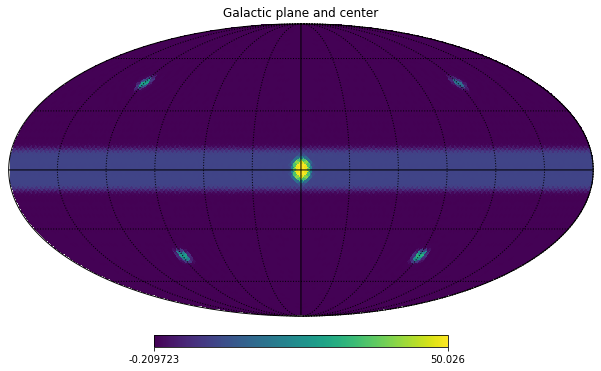

In [22]:
""" Example data"""

# Set empty array for pixel data
nside = 32
m = np.zeros(hp.nside2npix(nside))

# Set galactic plane
gal_width = 10 * u.deg
galaxy_plane_pixels = hp.query_strip(nside, np.pi/2 - gal_width.to_value(u.radian),
                                     np.pi/2+ gal_width.to_value(u.radian))
m[galaxy_plane_pixels] = 10


# Set galatic centre
source_vector = hp.ang2vec(theta=np.pi/2, phi=0)
galactic_center_pixels = hp.query_disc(nside, source_vector, radius=(5*u.deg).to_value(u.radian))
m[galactic_center_pixels] = 50
#np.where(m ==50)

# Extra data
point_vec1 = hp.ang2vec(theta=np.pi/4, phi=2*np.pi/3)
point_vec2 = hp.ang2vec(theta=np.pi/4, phi=-2*np.pi/3)
point_vec3 = hp.ang2vec(theta=3*np.pi/4, phi=np.pi/2)
point_vec4 = hp.ang2vec(theta=3*np.pi/4, phi=-np.pi/2)
point_vec1_pixels = hp.query_disc(nside, point_vec1, radius=(2*u.deg).to_value(u.radian))
point_vec2_pixels = hp.query_disc(nside, point_vec2, radius=(2*u.deg).to_value(u.radian))
point_vec3_pixels = hp.query_disc(nside, point_vec3, radius=(2*u.deg).to_value(u.radian))  
point_vec4_pixels = hp.query_disc(nside, point_vec4, radius=(2*u.deg).to_value(u.radian))
m[point_vec1_pixels] = 45
m[point_vec2_pixels] = 30
m[point_vec3_pixels] = 35
m[point_vec4_pixels] = 40   

# Smooth map
data = hp.smoothing(m, fwhm=(3*u.deg).to_value(u.radian))
hp.mollview(data, title='Galactic plane and center')
hp.graticule()

/cita/h/home-2/otijani/Desktop/SURP/comparison_functions.py:79: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(shift_alms), title= 'log10 '+ prefix + ' Rotated in spherical harmonics space', max = max, min= min ,unit=unit)
/cita/h/home-2/otijani/Desktop/SURP/comparison_functions.py:81: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(shift_pixel), title= 'log10 '+ prefix +' Rotated in pixel space', max = max, min= min ,unit=unit)
/cita/h/home-2/otijani/Desktop/SURP/comparison_functions.py:83: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(return_alms), title= 'log10 '+ prefix +' Rotated back in spherical harmonics space', max = max, min= min ,unit=unit)
/cita/h/home-2/otijani/Desktop/SURP/comparison_functions.py:85: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(return_pixel), title= 'log10 '+ prefix +' Rotated back in pixel space', max = max, min= min ,unit=unit)


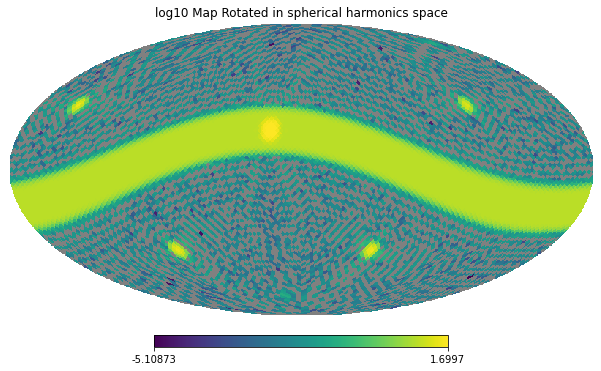

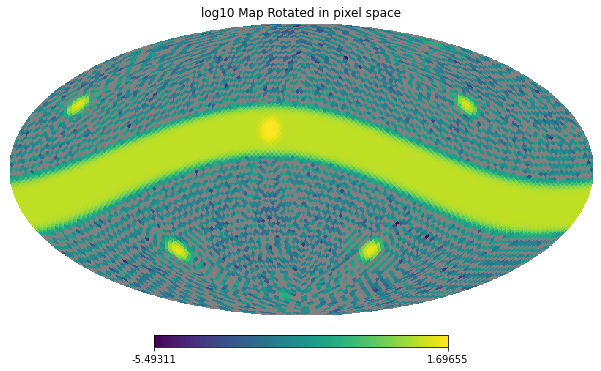

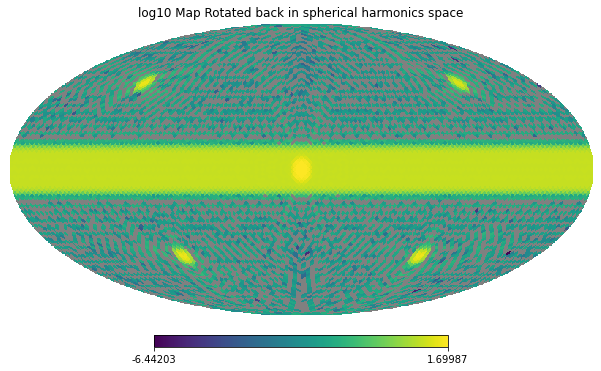

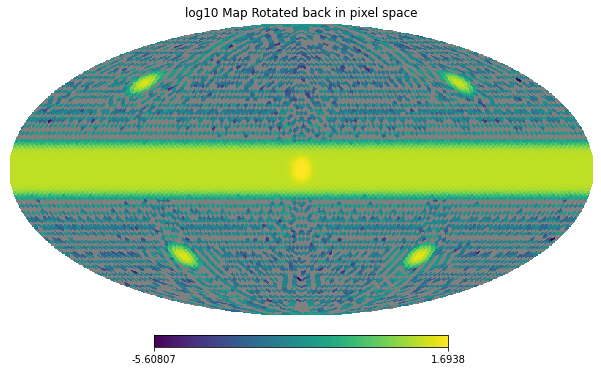

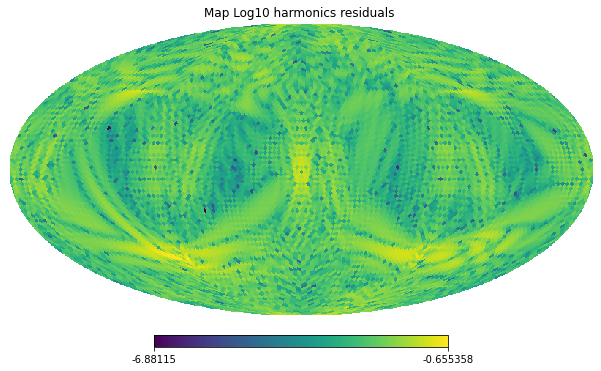

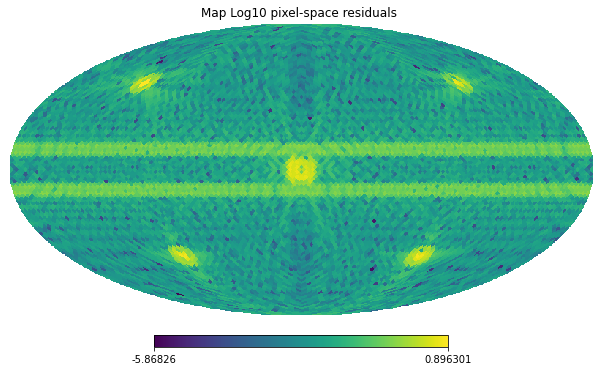

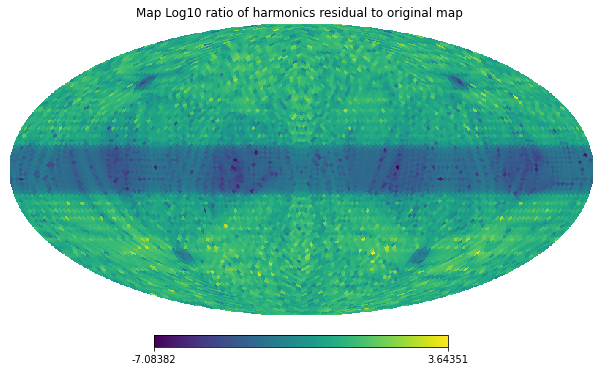

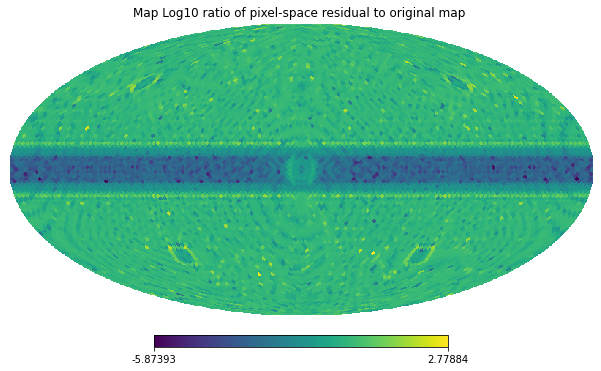

In [23]:
# Get the residuals and ratio plots
ringed, residual_alms,residual_pixel,index = cf.compare_rotator_methods(data,[20,20])
cf.plot_residuals_ratios(ringed, residual_alms,residual_pixel)


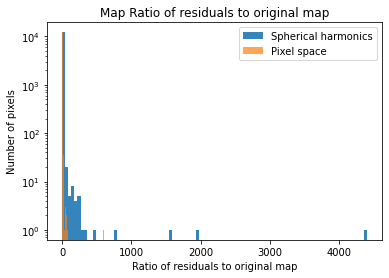

In [24]:
# Get histogram plot
cf.ratio_histogram(ringed, residual_alms,residual_pixel)